In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
#filename = 'root_files/histo_2Electrons_20893_mtdclusters.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff.root'
filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff_100GeV.root'
file = uproot.open(filename)

In [3]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
ETLclusters = file["ticlNtuplizer/ETL"]

In [5]:
#simtrackstersCP.keys()

In [6]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()

SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()

In [7]:
ETL_time    = ETLclusters["mtd_clusters_time"].array()
ETL_timeErr = ETLclusters["mtd_clusters_timeErr"].array()

In [8]:
CP_vm = simtrackstersCP["vertices_multiplicity"].array()
SC_vm = simtrackstersSC["vertices_multiplicity"].array()

In [9]:
SC_vx = simtrackstersSC["vertices_x"].array()
SC_vy = simtrackstersSC["vertices_y"].array()
SC_vz = simtrackstersSC["vertices_z"].array()
SC_ve = simtrackstersSC["vertices_energy"].array()
SC_vi = simtrackstersSC["vertices_indexes"].array()
SC_vt = simtrackstersSC["vertices_time"].array()

SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_be = simtrackstersSC["raw_energy"].array()

CP_vx = simtrackstersCP["vertices_x"].array()
CP_vy = simtrackstersCP["vertices_y"].array()
CP_vz = simtrackstersCP["vertices_z"].array()
CP_ve = simtrackstersCP["vertices_energy"].array()
CP_vi = simtrackstersCP["vertices_indexes"].array()
CP_vt = simtrackstersSC["vertices_time"].array()

CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()
CP_be = simtrackstersCP["raw_energy"].array()

In [10]:
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_err = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time = simtrackstersSC["MTDtime"].array()
SC_MTD_err = simtrackstersSC["MTDtimeError"].array()

CP_CALO_time = simtrackstersSC["time"].array()
CP_CALO_err = simtrackstersSC["timeError"].array()
CP_boundary_time = simtrackstersSC["BoundaryTime"].array()
CP_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
CP_MTD_time = simtrackstersSC["MTDtime"].array()
CP_MTD_err = simtrackstersSC["MTDtimeError"].array()

In [11]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

In [12]:
def hist(X, weights=None, bins=30, title='title', xlabel='time (ns)', ylabel='Counts'):
    plt.figure(dpi=100)
    if weights == None:
        plt.hist(ak.flatten(X), bins=bins, color='dodgerblue')
    else:
        plt.hist(ak.flatten(X), bins=bins, color='dodgerblue', weights=ak.flatten(weights))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [13]:
def scatter(X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    plt.figure(dpi=100)
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [14]:
def subplot(axs, X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts'):
    #bins=ak.sum(X>-98)
    axs.hist(ak.flatten(X), bins=bins, color='dodgerblue')
    axs.set_title(title)
    axs.grid()

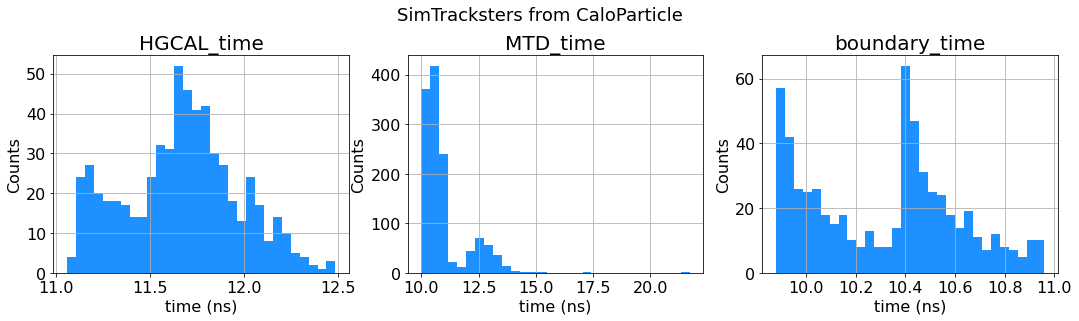

In [17]:
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
# fig.suptitle('SimTracksters from SimClusters', size=18, y=1.05)

# subplot(axs[0], SC_CALO_time, title='HGCAL_time')
# axs[0].set_title('HGCAL_time')
# subplot(axs[1], ETL_time, title='MTD_time')
# subplot(axs[2], SC_boundary_time, title='boundary_time')

# for ax in axs.flat:
#     ax.set_xlabel('time (ns)', fontsize = 16.0)    
#     ax.set_ylabel('Counts', fontsize = 16.0)
#-------
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[0], CP_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
subplot(axs[2], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

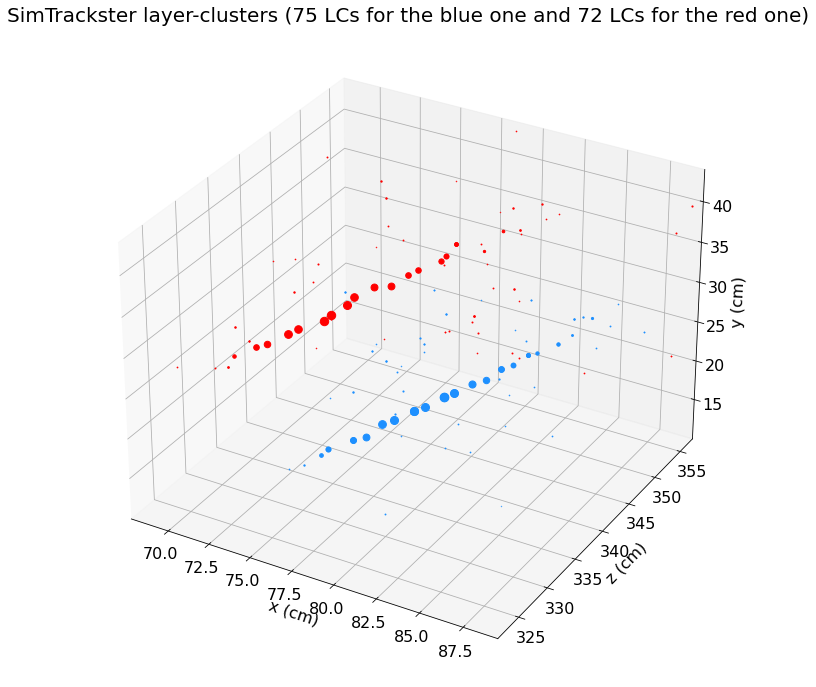

In [18]:
eid = 1

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_ylim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax1.scatter(x, z, y, s=8*e, c='dodgerblue')

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c='red')

ax1.set_title(f"SimTrackster layer-clusters ({len(tx1)} LCs for the blue one and {len(tx2)} LCs for the red one)")
plt.show()

In [19]:
%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_ylim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_zlim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
blue = 0
for x, y, z, e, t in zip(tx1, ty1, tz1, te1, tt1):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='dodgerblue', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t) , size=12) #+ (x**2+y**2+z**2)**0.5/C)
        blue += 1

red = 0
for x, y, z, e, t in zip(tx2, ty2, tz2, te2, tt2):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='r', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t), size=12) #+ (x**2+y**2+z**2)**0.5/C
        red += 1

ax1.set_title(f"SimTrackster layer-clusters with time\n({blue} LCs for the blue one and {red} LCs for the red one)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
eid = 0

import pandas as pd

df1 = pd.DataFrame({"time": np.array(tt1) + (np.array(tx1)**2+np.array(ty1)**2+np.array(tz1)**2)**0.5/C,
                   "x" :    np.array(tx1), 
                   "y" :    np.array(ty1), 
                   "z" :    np.array(tz1), 
                   "e" :    np.array(te1),
                   "c" :    ['dodgerblue']*len(np.array(tt1))})
df1 =  df1[df1['time']>-80]

df2 = pd.DataFrame({"time": np.array(tt2) + (np.array(tx2)**2+np.array(ty2)**2+np.array(tz2)**2)**0.5/C,
                   "x" :    np.array(tx2), 
                   "y" :    np.array(ty2), 
                   "z" :    np.array(tz2), 
                   "e" :    np.array(te2),
                   "c" :    ['red']*len(np.array(tt2))})
df2 =  df2[df2['time']>-80]

frames = [df1, df2]
df = pd.concat(frames)
#df

deltaT = 0.05 # 30ps
valid_times = df[df['time']>-80]['time']
tmin = min(valid_times)
tmax = max(valid_times)
print('t_min = {:.3f}, t_max = {:.3f}'.format(tmin, tmax))

nframes = len(df['time'])*2
times = np.linspace(tmin, tmax, nframes)

t_min = 22.331, t_max = 24.599


In [ ]:
%matplotlib widget
plt.style.use('default')

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

def update_graph(num):
    #condition = np.where((CP_vt[eid][tr_id]<=times[n]+deltaT) & (CP_vt[eid][tr_id]>=times[n]-deltaT))
    data=df[(df['time']<=times[num]+deltaT) & (df['time']>=times[num]-deltaT)]
    graph._offsets3d = (data.x, data.y, data.z)
    graph.set_sizes(5*np.array(data.e))
    graph.set_edgecolor(np.array(data.c))
    graph.set_facecolor(np.array(data.c))
    title.set_text('Two closeby electrons, time={:.3f} ns'.format(times[num]))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Two closeby electrons')
xlab = ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')

# ax.set_xlim(ak.min(CP_vx[eid])-10, ak.max(CP_vx[eid])+10)
# ax.set_ylim(ak.min(CP_vy[eid])-10, ak.max(CP_vy[eid])+10)
# ax.set_zlim(ak.min(CP_vz[eid])-10, ak.max(CP_vz[eid])+10)

data=df[(df['time']<=times[0]+deltaT) & (df['time']>=times[0]-deltaT)]
graph = ax.scatter(data.x, data.y, data.z, s=5*data.e, c=data.c)
#print(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, nframes, 
                               interval=1000, blit=False)

from matplotlib.animation import PillowWriter
#ani.save("closeByElectronsCorrected2.gif", writer=PillowWriter(fps=2))
plt.show()

## Calculate time along skeleton

In [24]:
from wpca import WPCA, EMPCA

In [25]:
def create_tr_skeletons_single_pca(vx, vy, vz, ve, vt, vi, vm, bx, by, bz, be, bt, ev, tr_id, DST_THR=2.5, bubble_size=10, 
                                   NEIGHBOUR_THR=30, ENERGY_RATIO_THR=0.01, MIN_EDGE_LEN=1, PCA_NEIGHBOUR_THR=1, 
                                  secondary_edges = False):
    # Project the points on pca
    edges, nodes = set(), set()
    covered_nodes = set()
    covered_node_idx = []
    times = []
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Reconstruction of an electron\nLayer Clusters")
    ax.set(xlabel="x (cm)", ylabel="y (cm)", zlabel="z (cm)")
    
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(vx[eid], vy[eid], vz[eid], ve[eid], vt[eid], vi[eid], vm[eid])

    if tr_id == 0:
        vxt = tx1
        vyt = ty1
        vzt = tz1
        vet = te1
        vtt = tt1
        
        bxt = bx[ev][0]
        byt = by[ev][0]
        bzt = bz[ev][0]
        bet = be[ev][0]
        btt = bt[ev][0]
    else:
        vxt = tx2
        vyt = ty2
        vzt = tz2
        vet = te2
        vtt = tt2    
        
        bxt = bx[ev][1]
        byt = by[ev][1]
        bzt = bz[ev][1]
        bet = be[ev][1]   
        btt = bt[ev][1]
    #ax.scatter(vxt, vyt, vzt, s=vet*bubble_size, alpha=0.2, c="m", zorder=-5)  
    
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    edges.add((tuple(b_coord), tuple(b_coord)))
    nodes.add(tuple(b_coord))
    times.append(np.array([bxt, byt, bzt, btt]))
    ax.scatter(bxt, byt, bzt, s=10, c="red", label=f"{len(vet)} LC: {sum(vet):.2f} GeV")

    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    min_point = np.zeros(4)
    max_point = np.zeros(4)
    # try create main edges
    
    for x,y,z,e,i,j in data:
        # plot times
        if i > -80:
            ax.text(x, y, z, '%.3f ns' % (i), size=12) #+ (x**2+y**2+z**2)**0.5/C
        
        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl and point[3]>-80:
                min_p = closest_point
                min_point = point
            if max_p[2] < z_cl and point[3]>-80:
                max_p = closest_point  
                max_point = point  
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            edges.add((tuple(min_p), tuple(b_coord)))
            nodes.add(tuple(min_p))
            times.append(min_point)
            ax.plot([bxt, min_p[0]], [byt, min_p[1]], [bzt, min_p[2]], c='red')    

        if not np.allclose(max_p, b_coord, atol=0.1):
            edges.add((tuple(max_p), tuple(b_coord)))
            nodes.add(tuple(max_p))
            times.append(max_point)
            ax.plot([bxt, max_p[0]], [byt, max_p[1]], [bzt, max_p[2]], c='green')
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt
        
    print('times of the nearest LCs: {:.3f} ns, {:.3f} ns'.format(min_point[3], max_point[3]))
    ax.scatter(min_point[0], min_point[1], min_point[2], s=20, alpha=0.8, c="r", zorder=-5)   
    ax.scatter(max_point[0], max_point[1], max_point[2], s=20, alpha=0.8, c="r", zorder=-5)
    #ax.text(min_point[0], min_point[1], min_point[2], '%.3f ns' % (min_point[3]), size=12)   
    #ax.text(max_point[0], max_point[1], max_point[2], '%.3f ns' % (max_point[3]), size=12)
    
    # speed of the particle (?)
    min_speed = np.linalg.norm(min_point[:3] - b_coord) / abs(min_point[3] - btt)
    max_speed = np.linalg.norm(max_point[:3] - b_coord) / abs(max_point[3] - btt)
    print('speed of particle along PCA segments: {:.3f} cm/ns, {:.3f} cm/ns'.format(min_speed, max_speed))
    speed = np.linalg.norm(max_point[:3] - min_point[:3]) / abs(max_point[3] - min_point[3])
    print('speed of particle: {:.3f} cm/ns'.format(speed))

    # compute times
    dist4t = ((min_p[0] - b_coord[0])**2 + (min_p[1] - b_coord[1])**2 + (min_p[2] - b_coord[2])**2)**0.5
    time1 = (dist4t/29.9792458)
    
    dist4t = ((max_p[0] - b_coord[0])**2 + (max_p[1] - b_coord[1])**2 + (max_p[2] - b_coord[2])**2)**0.5
    time2 = (dist4t/29.9792458)
    
    # plot times
    if abs(max_p[2])-abs(min_p[2])>0:
        ax.text(min_p[0], min_p[1], min_p[2], 'PCA: %.3f ns\nLC: %.3f ns' % (btt-time1, min_point[3]), size=12) 
        ax.text(b_coord[0], b_coord[1], b_coord[2], '%.3f ns' % (btt), size=12)
        ax.text(max_p[0], max_p[1], max_p[2], 'PCA: %.3f ns\nLC: %.3f ns' % (btt+time2, max_point[3]), size=12)
        print('times at the speed of light: {:.3f} ns, {:.3f} ns'.format(btt-time1, btt+time2))
    else:
        ax.text(min_p[0], min_p[1], min_p[2], 'PCA: %.3f ns\nLC: %.3f ns' % (btt+time1, min_point[3]), size=12) 
        ax.text(b_coord[0], b_coord[1], b_coord[2], '%.3f ns' % (btt), size=12)
        ax.text(max_p[0], max_p[1], max_p[2], 'PCA: %.3f ns\nLC: %.3f ns' % (btt-time2, max_point[3]), size=12)
        print('times at the speed of light: {:.3f} ns, {:.3f} ns'.format(btt-time2, btt+time1))
    
    #Build secondary edges
    for x,y,z,e,i,j in data:
        
        if e / max_en > ENERGY_RATIO_THR:
            # and not covered by any edge
            point = np.array([x, y, z, i])
            min_dist, min_edge, closest_point_edge, closest_endpoint =  find_dist_to_closest_edge_set(point[:3], edges)
            #print(min_dist)
            
            if min_dist < DST_THR:
                # LC covered by some edge already
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="green", zorder=-5)
                covered_nodes.add((x, y, z))
                covered_node_idx.append(j)  
                continue
            else:
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="black", zorder=-5)
                pass

            if not small_trackster and secondary_edges:
                # find neares higher
                # go through all points, if the point is within the Neighbour_threshold
                distances = dist_matrix[j]
                indices = np.argsort(distances)

                for idx in indices:

                    if idx in covered_node_idx and distances[idx] < NEIGHBOUR_THR and vet[idx] > e and abs(vzt[idx]) < abs(z):
                        # found the nearest higher
                        # create an edge - to projection of the nearest higher to the pca
                        #edges[(idx, j)] = (np.array([vxt[idx], vyt[idx], vzt[idx]]), point)
                        ax.plot([vxt[idx], x], [vyt[idx], y], [vzt[idx], z], c='blue')
                        nearest_higher = np.array([vxt[idx], vyt[idx], vzt[idx]])
                        
                        # TODO: check that it lies on the axis!!!!!!!!!!!!!!!
                        dist, closest_point = project_lc_to_pca(nearest_higher, b_coord, segment_end)

                        if not np.allclose(closest_point, point[:3], atol=0.1):
                            edges.add((tuple(closest_point), tuple(point[:3])))
                            nodes.add(tuple(closest_point))
                            nodes.add(tuple(point[:3]))
                            times.append(point)
                        ax.plot([closest_point[0], x], [closest_point[1], y], [closest_point[2], z], c='blue')

                        break
        else:
            # if low energy
            pass
            ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="blue", zorder=-5)
    
    edges.remove((tuple(b_coord), tuple(b_coord)))
    set_axes_equal(ax)
    plt.show()
    return edges, nodes, covered_node_idx, times

In [26]:
%matplotlib widget
eid   = 0
tr_id = 0
# create internal edges per each trackster
all_event_edges, all_event_nodes, covered_node_idxs, all_event_times = [], [], [], []
for tr_id in range(len(CP_bx[eid])):    
    #plt.style.use('default')
    internal_trackster_edges, internal_trackster_nodes, covered_node_idx, times = create_tr_skeletons_single_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                                                                          CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                                                                          tr_id=tr_id, bubble_size=100, 
                                                                                                          secondary_edges = False)
    #print(internal_trackster_edges)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    covered_node_idxs.append(covered_node_idx)
    all_event_times.append(times)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times of the nearest LCs: 11.025 ns, 11.625 ns
speed of particle along PCA segments: 38.598 cm/ns, 29.668 cm/ns
speed of particle: 32.587 cm/ns
times at the speed of light: 10.969 ns, 11.621 ns


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times of the nearest LCs: 11.446 ns, 12.246 ns
speed of particle along PCA segments: 98.391 cm/ns, 16.455 cm/ns
speed of particle: 27.094 cm/ns
times at the speed of light: 11.209 ns, 11.931 ns


In [95]:
all_event_speed = []
for eid in range(300):
    for tr_id in range(len(CP_bx[eid])):    
        s = create_tr_skeletons_single_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm, CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                                                                              tr_id=tr_id, bubble_size=100, 
                                                                                                              secondary_edges = False)
        all_event_speed.append(s)    
all_event_speed = np.array(all_event_speed)

In [103]:
plt.figure()
plt.hist(all_event_speed, bins=30)
plt.grid()
plt.xlabel('speed (cm/ns)', size=16)
plt.ylabel('Counts', size=16)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

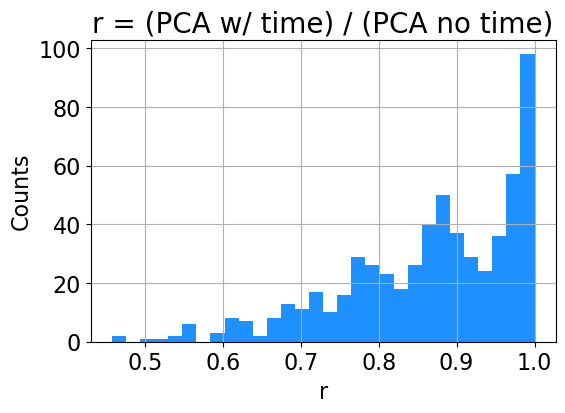

In [117]:
hist(np.array(all_event_lenght)/np.array(all_event_lenght2), xlabel='r', title = 'r = (PCA w/ time) / (PCA no time)')

## propagate to boundary

In [27]:
eid = 0
Z_boundary = 296 #cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of an electron")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

ax.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax.set_ylim(Z_boundary-10, ak.max(CP_vz[eid]))

# plot the boundary
xx, yy = np.meshgrid(np.linspace(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]), 10), np.linspace(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]), 10))
ax.plot_surface(xx, np.ones((10,10))*Z_boundary, yy, alpha=0.2)

# plot the skeleton
for edges in all_event_edges:
    for e in edges:
        ax.plot([e[0][0], e[1][0]], [e[0][2], e[1][2]], [e[0][1], e[1][1]], c='red')
for nodes in all_event_nodes:
    for n in nodes:
        ax.scatter(n[0], n[2], n[1], s=10, c='red')

for times in all_event_times:
    for x, y, z, t in times:
        ax.text(x, z, y, '%.3f ns' % (t), size = 12)

# propagate to boundary
for nodes, times in zip(all_event_nodes,all_event_times):
    nodi = np.array(list(nodes))
    tempi = np.sort(np.array(times)[:, 3])
    T = (Z_boundary - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

    projection = nodi[0] + T*(nodi[-1] - nodi[0])
    ax.scatter(projection[0], projection[2], projection[1], s=10, c='blue')
    ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='dodgerblue', linestyle='dashed')
    
    d_bound = np.linalg.norm(projection - nodi[0])
    d_pca = np.linalg.norm(nodi[-1] - nodi[0])
    t_pca = abs(tempi[0] - tempi[-1])
    v_pca = d_pca/t_pca
    t2bound = d_bound / v_pca
    t_bound = tempi[0] - t2bound

    ax.text(projection[0], projection[2], projection[1], '%.3f ns' % (t_bound), size = 12)
    
# propagate time 
for times in all_event_times:
    pass
#set_axes_equal(ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …